# Conditioning of Derviative Matrices

Construct a matrix that takes a (first) centered difference of a periodic function on $[0,1]$. Call that matrix `D`.

In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [80]:
npts = 100

In [81]:
#clear

x = np.linspace(0, 1, npts, endpoint=False)

h = x[1] - x[0]
D = (
    np.roll(np.diag(np.ones(npts)), -1, axis=0)
    -
    np.roll(np.diag(np.ones(npts)), 1, axis=0)
)/(2*h)

D

array([[  0.,  50.,   0., ...,   0.,   0., -50.],
       [-50.,   0.,  50., ...,   0.,   0.,   0.],
       [  0., -50.,   0., ...,   0.,   0.,   0.],
       ..., 
       [  0.,   0.,   0., ...,   0.,  50.,   0.],
       [  0.,   0.,   0., ..., -50.,   0.,  50.],
       [ 50.,   0.,   0., ...,   0., -50.,   0.]])

Or: an alternate matrix that's based on a global polynomial

In [70]:
a = np.arange(npts, dtype=np.float64)

# Chebyshev nodes
nodes = np.cos((2*(a+1)-1)/(2*npts)*np.pi)

x = nodes

Vdm = np.empty((npts, npts))
Vdm_deriv = np.zeros((npts, npts))
for i in range(npts):
    Vdm[:, i] = np.cos(i*np.arccos(x))
    Vdm_deriv[:, i] = (i*np.sin(i*np.arccos(x)))/np.sqrt(1-x**2)
        
D = Vdm_deriv @ la.inv(Vdm)

Test that the matrix actually takes derivatives:

In [82]:
alpha = 3

f = np.sin(alpha * 2*np.pi*x)
df = alpha*2*np.pi*np.cos(alpha * 2*np.pi*x)

print(la.norm(df - D@f, np.inf))

0.111424462966


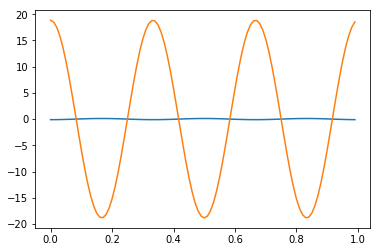

In [83]:
plt.plot(x, D@f- df)
plt.plot(x, df)

Investigate the norm of this matrix.

In [84]:
#clear
la.norm(D, np.inf)

100.0

What function gets amplified like that?

In [85]:
#clear
amp_func = np.ones(npts)
amp_func[2::4] = -1
amp_func[3::4] = -1
la.norm(D@amp_func, np.inf)

100.0

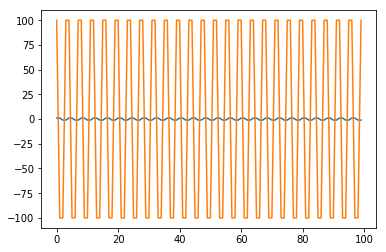

In [86]:
plt.plot(amp_func)
plt.plot(D@amp_func)

Now, what's the conditioning of this matrix like?

In [77]:
la.cond(D)

2.0564138575587231e+18

OK, this may not be completely fair. But: can look at the spectrum:

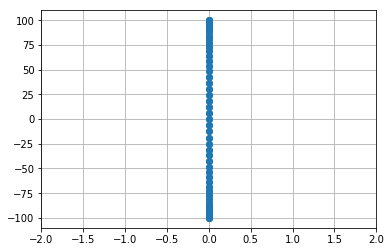

In [87]:
eigv = la.eigvals(D)

plt.plot(eigv.real, eigv.imag, "o")
plt.xlim([-2, 2])
#plt.ylim([-2, 2])
plt.grid()